In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [5]:
#Load the dataset
data=pd.read_csv('iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#Features preparation and normalizing
x=data.drop(columns=['Species'])
y=data['Species']

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [11]:
#Splitting - 80:20
x_train, x_test, y_train, y_test =  train_test_split(x_scaled,y,test_size=0.2,random_state=42,stratify=y)

In [13]:
#Different K-values
k_values=[1,3,5,7,9,11]
accuracies=[]
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    accuracies.append(acc)
    print(f"Accuracy for k={k}:{acc:.4f}")
best_k=k_values[np.argmax(accuracies)]
print(f"Best K found:{best_k}")

Accuracy for k=1:1.0000
Accuracy for k=3:1.0000
Accuracy for k=5:1.0000
Accuracy for k=7:1.0000
Accuracy for k=9:1.0000
Accuracy for k=11:1.0000
Best K found:1


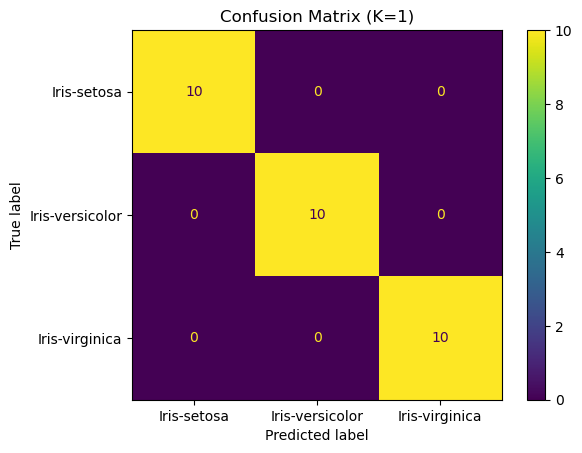

In [24]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(x_train, y_train)
y_pred_final = knn_final.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final, labels=knn_final.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_final.classes_)
disp.plot()
plt.title(f"Confusion Matrix (K={best_k})")
plt.savefig("knn_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

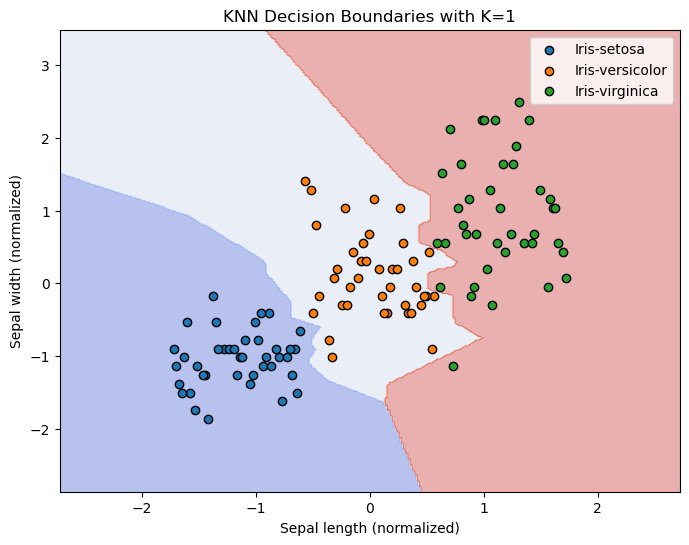

In [23]:
from sklearn.preprocessing import LabelEncoder

# Use only first two features for visualization
x_vis = x_scaled[:, :2]
x_train_vis, x_test_vis, y_train_vis, y_test_vis = train_test_split(
    x_vis, y, test_size=0.2, random_state=42, stratify=y
)

# Convert class labels (strings) to numbers for visualization
le = LabelEncoder()
y_train_vis_encoded = le.fit_transform(y_train_vis)

# Train KNN on numeric labels
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(x_train_vis, y_train_vis_encoded)

# Create meshgrid
h = 0.02
x_min, x_max = x_vis[:, 0].min() - 1, x_vis[:, 0].max() + 1
y_min, y_max = x_vis[:, 1].min() - 1, x_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

# Plot training points
for class_index, class_name in enumerate(le.classes_):
    plt.scatter(
        x_train_vis[y_train_vis_encoded == class_index, 0],
        x_train_vis[y_train_vis_encoded == class_index, 1],
        label=class_name,
        edgecolor='k'
    )

plt.xlabel("Sepal length (normalized)")
plt.ylabel("Sepal width (normalized)")
plt.title(f"KNN Decision Boundaries with K={best_k}")
plt.legend()
plt.savefig("knn_decision_boundary.png", dpi=300, bbox_inches='tight')
plt.show()